# <span style="color:green"> Compilazione ed esecuzione dei programmi </span>
Per compilare ed eseguire il programma è sufficiente make, ./es1.

In [14]:
#importazione pacchetti python necessari
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Esercizio 3.1

L'opzione europea è un tipo di contratto tra due entità economiche. Esiste di due tipi, l'opzione call e l'opzione put. Nell'opzione call una delle due parti garantisce all'altra la possibilità di acquistare da lui della merce a un certo prezzo K, detto striking price, a un certo tempo T nel futuro, la merce avrà un certo valore iniziale $S(0)$ ma esso varierà nel tempo quindi la merce verrà  comprata solo se è conveniente, ossia $S(T)-K > 0 $. Il profitto dell'acquirente sarà quindi $p=MAX[0,S(t)-k]$. Nella teoria di Black e Scholes il valore della merce ha variazioni analoghe a un moto browniano geometrico, questo permette di stimare quale sarà il valore della merce al tempo T e quindi di calcolare il prezzo K a cui è opportuno garantire la vendita della merce. La consegna è in realtà di calcolare il profitto medio dell'opzione di call per $K=S(0)$.

Questo è stato fatto con una stima diretta del moto browniano geometrico per il tempo T, e con una stima per passi (ossia dividendo l'intervallo temporale in 100 intervalli di tempo più piccoli) del moto browniano geometrico.  
Sotto le immagini dell'andamento del valore dell'opzione di call all'aumentare del numero di blocchi e la relativa incertezza (in rosso tratteggiato il valore calcolato analiticamente dell'opzione di call), per i seguenti parametri:  
- prezzo della merce a $t=0$: $S(0)=100$
- mometo in cui si può decidere se acquistare o no la merce: $T=1$
- prezzo fissato per l'acquisto della merce: $K=100$
- tasso d'interesse privo di rischio del moto browniano geometrico: $r=0.1$
- volatilità: $\sigma=0.25$  

In [15]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


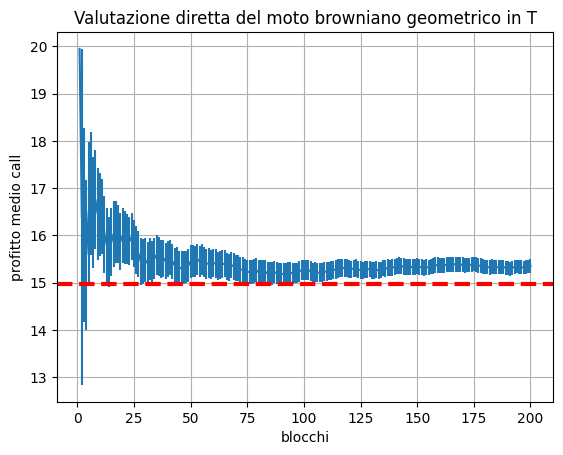

Dimensione blocchi:  100


In [16]:
media = np.loadtxt("call.dat",usecols=1,skiprows=1,dtype=float)
incertezza = np.loadtxt("call.dat",usecols=2,skiprows=1,dtype=float)
numlanci = np.loadtxt("call.dat",usecols=0,skiprows=1,dtype=int)
L = np.loadtxt("call.dat",dtype=int,max_rows=1)


plt.errorbar(numlanci,media,yerr=incertezza)
plt.axhline(y=call, color='r', linestyle='--', linewidth=3)
plt.xlabel('blocchi')
plt.ylabel('profitto medio call')
plt.title('Valutazione diretta del moto browniano geometrico in T')
plt.grid(True)
plt.show()

print('Dimensione blocchi: ',L)

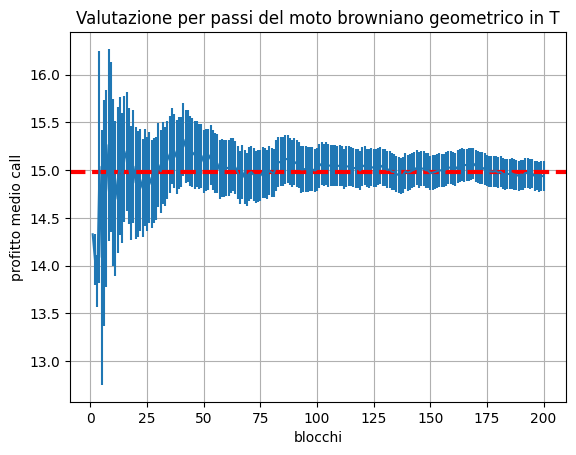

Dimensione blocchi:  100


In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

media = np.loadtxt("callstp.dat",usecols=1,skiprows=1,dtype=float)
incertezza = np.loadtxt("callstp.dat",usecols=2,skiprows=1,dtype=float)
numlanci = np.loadtxt("callstp.dat",usecols=0,skiprows=1,dtype=int)
L = np.loadtxt("callstp.dat",dtype=int,max_rows=1)


plt.errorbar(numlanci,media,yerr=incertezza)
plt.axhline(y=call, color='r', linestyle='--', linewidth=3)
plt.xlabel('blocchi')
plt.ylabel('profitto medio call')
plt.title('Valutazione per passi del moto browniano geometrico in T')
plt.grid(True)
plt.show()

print('Dimensione blocchi: ',L)

Si nota che nonostante una teorica equivalenza la divisione dell'intervallo temporale in blocchi più piccoli fornisce un risultato più allineato al valore teorico.

L'opzione di put è equivalente a quella di call ma in questo caso una delle due parti garantisce all'altra di potergli vendere la merce. La descrizione matematica è analoga ma si ha che il profitto è dato da $p=MAX[0,K-S(T)]$, anche in questo caso la descrizione del valore della merce come moto browniano geometrico permette di calcolare il profitto medio di un'opzione di put.  
Ho fatto questo con gli stessi parametri del caso precedente, sotto le immagini dell'andamento del valore dell'opzione di put all'aumentare del numero di blocchi e la relativa incertezza, in rosso tratteggiato il valore calcolato analiticamente dell'opzione di put.

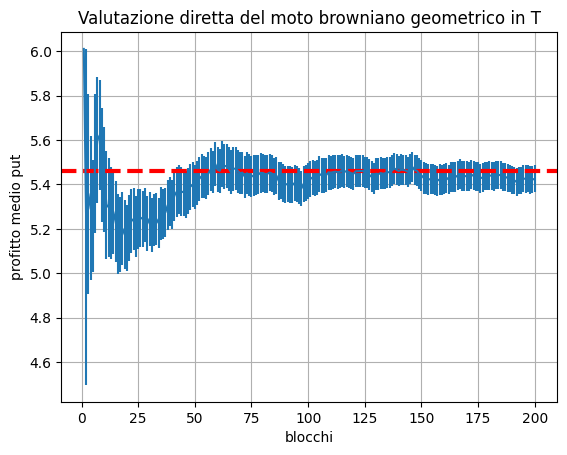

Dimensione blocchi:  100


In [18]:
media = np.loadtxt("put.dat",usecols=1,skiprows=1,dtype=float)
incertezza = np.loadtxt("put.dat",usecols=2,skiprows=1,dtype=float)
numlanci = np.loadtxt("put.dat",usecols=0,skiprows=1,dtype=int)
L = np.loadtxt("put.dat",dtype=int,max_rows=1)


plt.errorbar(numlanci,media,yerr=incertezza)
plt.axhline(y=put, color='r', linestyle='--', linewidth=3)
plt.xlabel('blocchi')
plt.ylabel('profitto medio put')
plt.title('Valutazione diretta del moto browniano geometrico in T')
plt.grid(True)
plt.show()

print('Dimensione blocchi: ',L)

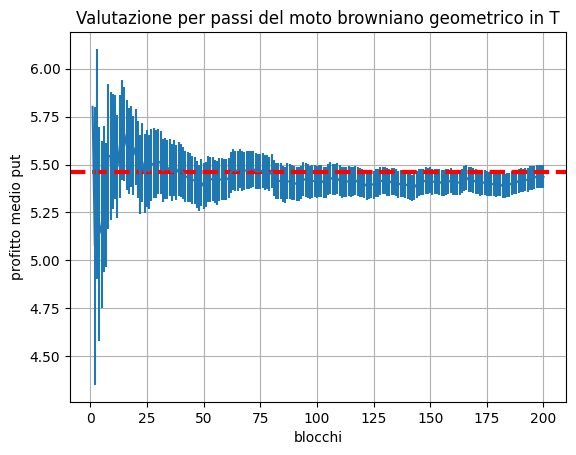

Dimensione blocchi:  100


In [19]:
media = np.loadtxt("putstp.dat",usecols=1,skiprows=1,dtype=float)
incertezza = np.loadtxt("putstp.dat",usecols=2,skiprows=1,dtype=float)
numlanci = np.loadtxt("putstp.dat",usecols=0,skiprows=1,dtype=int)
L = np.loadtxt("putstp.dat",dtype=int,max_rows=1)


plt.errorbar(numlanci,media,yerr=incertezza)
plt.axhline(y=put, color='r', linestyle='--', linewidth=3)
plt.xlabel('blocchi')
plt.ylabel('profitto medio put')
plt.title('Valutazione per passi del moto browniano geometrico in T')
plt.grid(True)
plt.show()

print('Dimensione blocchi: ',L)

In questo caso, come atteso, la previsione del profitto dell'opzione di put ha circa lo stesso allineamento con il valore calcolato analiticamente sia per il caso di valutazione diretta del moto browniano geometrico sia per il caso di valutazione per passi.